<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_CD_ex1_LR_solucao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




# **Exercício 1 - 3o bimestre - ECM514 Ciência de Dados**

In [41]:
#@markdown Nome completo e RA (*\<nome\>, \<RA\>*)
Aluno = 'Daniel Henrique, 1115665' #@param {type:"string"}






In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


# Exercício 1.

Neste exercício você fará diferentes modelos de regressão linear para estimar o peso de pinguins (`body_mass_mg`).

1. Desconsidere linhas com valores nulos (*Pre-processing*).
2. Empregue inicialmente todas as variáveis disponíveis no modelo. Para as variáveis categóricas faça o hot encode eliminando a multicolinearidade excluindo a categoria de menor valor (drop 'first') (*Pre-processing*).
3. Examine as variáveis significativas e implemente um modelo com o **`SCIKIT-LEARN`** adicionando ainda uma variável de interação entre `bill_length_mm` e `bill_depth_mm` **OU**  `bill_length_mm`,`bill_depth_mm` e `flipper_length_mm`, a que se mostrar significativa.
4. Empregue esse último modelo para prever o peso de um pinguim fêmea com medidas médias da espécie Chinstrap e compare com os valores reais.

In [43]:
df = sns.load_dataset('penguins')
display(df.head())

df.to_csv('penguins_1.csv',index=None)

df.sex = df.sex.replace('Male','X')
display(df.head())
df.sex = df.sex.replace('Female','Male')
display(df.head())
df.sex = df.sex.replace('X','Female')
display(df.head())

df.to_csv('penguins_2.csv',index=None)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,X
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,X
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Male
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Male
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Male


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Female
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Male
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Male
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Male


In [44]:
path = 'https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/'

df = pd.read_csv(path + 'penguins_2.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Female
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Male
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Male
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Male


## Pre-Processing

In [45]:
df = df.dropna()

In [46]:
df= pd.get_dummies(df, columns=['island', 'sex', 'species'], drop_first=True)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,False,True,False,False,False
1,39.5,17.4,186.0,3800.0,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,False,True,False,False,False


In [47]:
#@markdown **Check**, must be TRUE after pre-processing
display((df.sum().sum() == 1488762.5) or (df.sum().sum() == 1488759.5))


np.True_

## Feature selection

Q1. Que atributos não são significativos e qual o R2 ajustado para o modelo somente com coeficientes significativos? (**mantenha o intercept independente de ser significativo ou não**, não há pinguim de peso 0!)

In [48]:
def create_formula(target,df):

  features = [col for col in df.columns if col != target]

  # Create the formula string
  formula = f'{target} ~ {" + ".join(features)}'
  return formula

create_formula('body_mass_g',df)


'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + island_Dream + island_Torgersen + sex_Male + species_Chinstrap + species_Gentoo'

In [49]:
import statsmodels.formula.api as sm

model = sm.ols(formula=create_formula('body_mass_g',df), data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          1.85e-141
Time:                        18:08:48   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [50]:
df = df.drop(columns=[x for x in df.columns if x.startswith('island')])
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,False,False,False
1,39.5,17.4,186.0,3800.0,True,False,False
2,40.3,18.0,195.0,3250.0,True,False,False
4,36.7,19.3,193.0,3450.0,True,False,False
5,39.3,20.6,190.0,3650.0,False,False,False


In [51]:
model = sm.ols(formula=create_formula('body_mass_g',df), data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          6.82e-144
Time:                        18:08:48   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Variáveis de Interação

Q2. Quais das interações  `bill_length_mm` e `bill_depth_mm` **OU**  `bill_length_mm`,`bill_depth_mm` e `flipper_length_mm` é significativa ao ser incluída no modelo? Informe o p-value encontrado para ela.

In [52]:
model = sm.ols(formula=create_formula('body_mass_g',df) + '+ bill_length_mm:bill_depth_mm', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     333.7
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          3.15e-144
Time:                        18:08:48   Log-Likelihood:                -2350.1
No. Observations:                 333   AIC:                             4716.
Df Residuals:                     325   BIC:                             4747.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Modelo de Interação com o `scikit-learn`

Q3. Implemente o modelo de interação *obtido* com o `scikit-learn`. Qual o R2 e o coeficiente de `bill_length_mm` obtidos desse modelo?

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df.drop(columns=['body_mass_g'])
y = df['body_mass_g']

X['bill_length_mm:bill_depth_mm'] = X['bill_length_mm']*X['bill_depth_mm']

model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

Coeficientes:  {'bill_length_mm': np.float64(130.27370728150584), 'bill_depth_mm': np.float64(333.92372427532473), 'flipper_length_mm': np.float64(16.534706001788543), 'sex_Male': np.float64(-391.6034552694564), 'species_Chinstrap': np.float64(-200.76309176841465), 'species_Gentoo': np.float64(923.7883820251494), 'bill_length_mm:bill_depth_mm': np.float64(-6.344005319962605)}
Intercept:  -5898.842330236504
Score (R2):  0.8778468496998637



## Predição com o `scikit-learn`

Q4. Como o modelo de interação *obtido* qual o peso estimado de um pinguim fêmea com medidas médias da espécie Chinstrap e o valor real?  

In [54]:
df_species_Chinstrap = pd.DataFrame(df[(~df['sex_Male']) & (df.species_Chinstrap)].mean()).T
df_species_Chinstrap['bill_length_mm:bill_depth_mm'] = df_species_Chinstrap['bill_length_mm']*X['bill_depth_mm']
body_mass_g_species_Chinstrap = df_species_Chinstrap['body_mass_g'].values
df_species_Chinstrap.drop(columns=['body_mass_g'],inplace=True)

# print(df_species_Chinstrap)
body_mass_g_species_Chinstrap_predicted = model.predict(df_species_Chinstrap)

print(f'predicted: {body_mass_g_species_Chinstrap_predicted[0]:.2f} real mean: {body_mass_g_species_Chinstrap[0]:.2f}')

predicted: 4229.67 real mean: 3938.97


# Exercício 2.

Neste exercício você vai comparar os resultados de predição de modelos estatísticos de séries temporais (ARIMA) com os de um modelo de aprendizado de máquina (regressão linear).

1. Crie dois modelos ARIMA para série de LOD - Length Of the Day acumulado. A série é estacionária para $d=2$, o primeiro modelo empregará as componentes regressiva e de médias móveis (ARIMA) unitárias. O segundo, apenas a componente regressiva (também unitária). O modelo é estimado sobre todos os dados. Calcule o erro de ajuste do modelo (RMSE).
2. Em seguida crie um modelo de regressão linear para ajustar os valores da série. Empregue 2 lag no modelo (o número de features de atraso como ensinado em aula, ver o livro de Séries Temporais, Cap. 5, Aprendizado de Máquina). O modelo é estimado sobre todos os dados. Calcule o erro de ajuste do modelo (RMSE).






In [55]:
df = pd.read_csv('https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/Delta_LOD.csv',sep=';',usecols=['year', 'month', 'day', 'lod(ms)', 'sig(ms)'])
df.index = pd.to_datetime(df[["year", "month", "day"]])

ts = df[['lod(ms)']].cumsum().resample('YE').mean()
ts.head()

,lod(ms)
1962-12-31,236.279118
1963-12-31,733.407214
1964-12-31,1392.497363
1965-12-31,2144.264740
1966-12-31,2993.562956


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

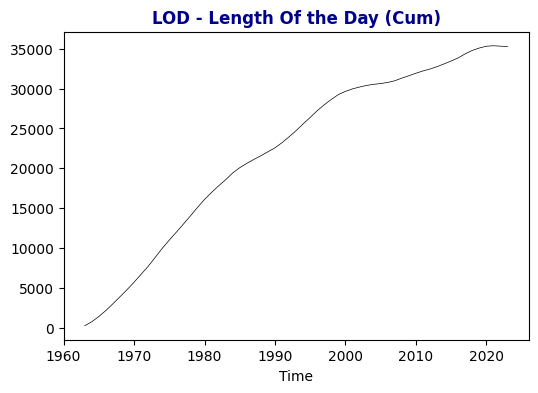

In [57]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(ts,label='Daily Cum Yearly',color='k',linestyle='-',lw=0.5)

ax.set_title('LOD - Length Of the Day (Cum)',weight='bold',color='darkblue')
ax.set_xlabel('Time')

plt.show()

## Modelos ARIMA

Q5. Qual o RMSE dos dois modelos "ARIMA" empregados? Como base no summary, explique a razão de um dos modelos ser "melhor" (menor erro)  que o outro.

                               SARIMAX Results                                
Dep. Variable:                lod(ms)   No. Observations:                   61
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -335.896
Date:                Thu, 09 Oct 2025   AIC                            677.792
Time:                        18:08:48   BIC                            684.025
Sample:                    12-31-1962   HQIC                           680.225
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6349      0.246      2.576      0.010       0.152       1.118
ma.L1         -0.1899      0.302     -0.629      0.529      -0.782       0.402
sigma2      5146.2136    965.760      5.329      0.0

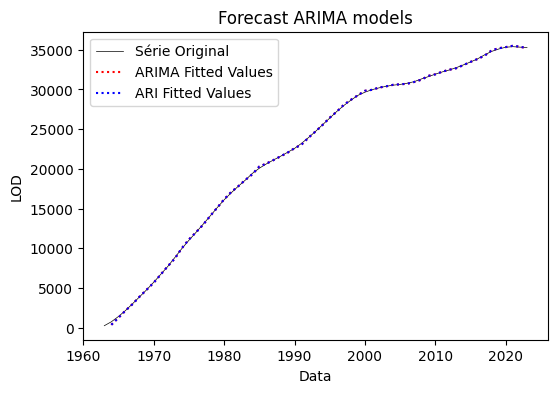


 ARIMA
MSE: 5237.47
RMSE: 72.37

 ARI
MSE: 5283.26
RMSE: 72.69


In [58]:
order_ARIMA = (1,2,1)
order_ARI = (1,2,0)

model_ARIMA = ARIMA(ts, order=order_ARIMA).fit()
print(model_ARIMA.summary())

model_ARI = ARIMA(ts, order=order_ARI).fit()
print(model_ARI.summary())

plt.figure(figsize=(6,4))
plt.plot(ts, label='Série Original',color='k',lw=0.5)
plt.plot(model_ARIMA.fittedvalues[1::], label='ARIMA Fitted Values', color='red',linestyle=':')
plt.plot(model_ARI.fittedvalues[1::], label='ARI Fitted Values', color='blue',linestyle=':')

plt.title('Forecast ARIMA models')
plt.xlabel('Data')
plt.ylabel('LOD')
plt.legend()
plt.show()

shift = 2
print('\n ARIMA')
_ = calculate_metrics(ts[shift::]['lod(ms)'], model_ARIMA.fittedvalues[shift::])

print('\n ARI')
_ = calculate_metrics(ts[shift::]['lod(ms)'], model_ARI.fittedvalues[shift::])

## Modelo de Regressão Linear

Q6. Qual o RMSE do modelo de Regressão Linear empregando-se 2 lags?

In [59]:
ts_copy = ts.copy()

ts['lod(ms)_t-1'] = ts['lod(ms)'].shift()
ts['lod(ms)_t-2'] = ts['lod(ms)'].shift(2)
ts.dropna(inplace=True)
ts.head()

,lod(ms),lod(ms)_t-1,lod(ms)_t-2
1964-12-31,1392.497363,733.407214,236.279118
1965-12-31,2144.264740,1392.497363,733.407214
1966-12-31,2993.562956,2144.264740,1392.497363
1967-12-31,3871.311751,2993.562956,2144.264740
1968-12-31,4754.511667,3871.311751,2993.562956


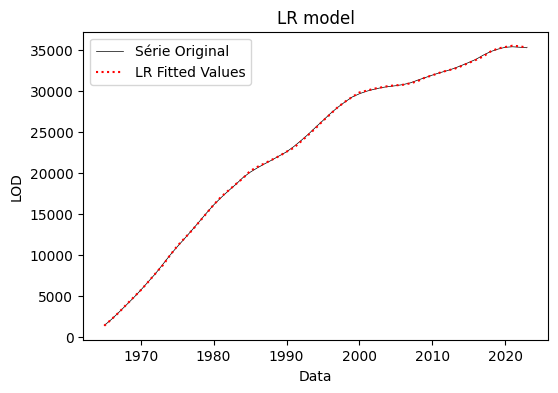


 RL
MSE: 5077.05
RMSE: 71.25


In [60]:
from sklearn import linear_model

X = ts.drop(columns=['lod(ms)'])
y = ts['lod(ms)']

reg = linear_model.LinearRegression()

reg.fit(X, y)
y_pred = reg.predict(X)

plt.figure(figsize=(6,4))
plt.plot(y, label='Série Original',color='k',lw=0.5)
plt.plot(ts.index, y_pred, label='LR Fitted Values', color='red',linestyle=':')

plt.title('LR model')
plt.xlabel('Data')
plt.ylabel('LOD')
plt.legend()
plt.show()

print('\n RL')
_ = calculate_metrics(y,y_pred)

## Predição

Q7. Descreva como você faria para fazer uma predição do lod acumulado até 2050 empregando o modelo de regressão linear.



Aqui um exemplo de implementação para 1 lag.

In [61]:
ts = ts_copy.copy()

ts['lod(ms)_t-1'] = ts['lod(ms)'].shift()
ts.dropna(inplace=True)
ts.head()

,lod(ms),lod(ms)_t-1
1963-12-31,733.407214,236.279118
1964-12-31,1392.497363,733.407214
1965-12-31,2144.264740,1392.497363
1966-12-31,2993.562956,2144.264740
1967-12-31,3871.311751,2993.562956


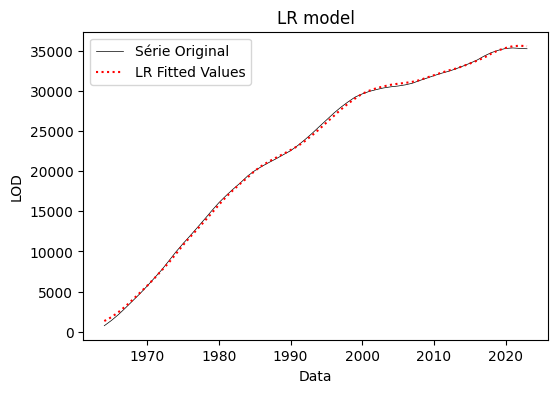


 RL
MSE: 41528.11
RMSE: 203.78


In [62]:
X = ts.drop(columns=['lod(ms)'])
y = ts['lod(ms)']

reg = linear_model.LinearRegression()

reg.fit(X, y)
y_pred = reg.predict(X)

plt.figure(figsize=(6,4))
plt.plot(y, label='Série Original',color='k',lw=0.5)
plt.plot(ts.index, y_pred, label='LR Fitted Values', color='red',linestyle=':')

plt.title('LR model')
plt.xlabel('Data')
plt.ylabel('LOD')
plt.legend()
plt.show()

print('\n RL')
_ = calculate_metrics(y,y_pred)

In [63]:
future_years = pd.DataFrame()
future_years.index = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), end='2050-12-31', freq='YE')
future_years['lod(ms)'] = 0.0

future_years.loc['2023-12-31','lod(ms)_t-1'] = ts.iloc[-1,0]
print(future_years.head())

            lod(ms)   lod(ms)_t-1
2023-12-31      0.0  35289.373817
2024-12-31      0.0           NaN
2025-12-31      0.0           NaN
2026-12-31      0.0           NaN
2027-12-31      0.0           NaN


In [64]:
for i in range(len(future_years)-1):
  future_years.iloc[0+i,0] = reg.predict(future_years.iloc[0+i:i+1][['lod(ms)_t-1']])
  future_years.iloc[1+i,1] = future_years.iloc[0+i,0]

i = i+1
future_years.iloc[0+i,0] = reg.predict(future_years.iloc[0+i:i+1][['lod(ms)_t-1']])
future_years.head()

,lod(ms),lod(ms)_t-1
2023-12-31,35569.290165,35289.373817
2024-12-31,35842.796877,35569.290165
2025-12-31,36110.040722,35842.796877
2026-12-31,36371.165109,36110.040722
2027-12-31,36626.310166,36371.165109


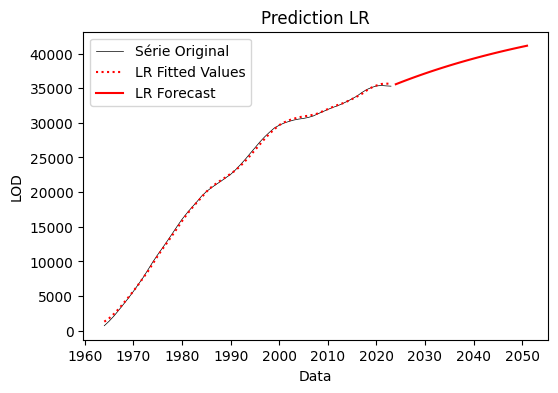

In [65]:
plt.figure(figsize=(6,4))
plt.plot(y, label='Série Original',color='k',lw=0.5)
plt.plot(ts.index, y_pred, label='LR Fitted Values', color='red',linestyle=':')
plt.plot(future_years['lod(ms)'], label='LR Forecast', color='red',linestyle='-')

plt.title('Prediction LR')
plt.xlabel('Data')
plt.ylabel('LOD')
plt.legend()
plt.show()